# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
import scipy.stats as stats
import gensim
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
df = pd.read_csv(airbnbDataSet_filename, header = 0)
df.head(40)


,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,Laurie,"New York, New York, United States","Hello, \r\nI will be welcoming and helpful, w...",1.00,1.00,True,3.0,...,4.82,4.87,4.73,False,3,1,2,0,1.48,7
6,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,Allen & Irina,"New York, New York, United States",We love to travel. When we travel we like to s...,1.00,1.00,True,1.0,...,4.80,4.67,4.57,True,1,1,0,0,1.24,7
7,UES Beautiful Blue Room,Beautiful peaceful healthy home<br /><br /><b>...,"Location: Five minutes to Central Park, Museum...",Cyn,"New York, New York, United States",Capturing the Steinbeck side of life in its Fi...,1.00,1.00,True,3.0,...,4.95,4.84,4.84,True,1,0,1,0,1.82,5
8,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",Joelle,"New York, New York, United States",I have lived in the same apartment in Brooklyn...,1.00,0.00,True,2.0,...,5.00,5.00,5.00,False,2,0,2,0,0.07,5
9,Perfect for Your Parents: Privacy + Garden,"Parents/grandparents coming to town, or are yo...","Residential, village-like atmosphere. Lots of ...",Jane,"New York, New York, United States",I have been an Airbnb host since 2009 -- just ...,1.00,0.99,True,1.0,...,4.91,4.93,4.78,True,2,1,1,0,3.05,8


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [4]:
#Summary statistics
df.shape #(28022,50)
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [5]:
#Removing unecessary columns for the label
col_remove = ['host_name', 'host_about', 'host_response_rate', 'host_acceptance_rate',
              'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 
              'neighbourhood_group_cleansed', 'room_type', 'minimum_minimum_nights',
              'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
              'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'number_of_reviews_ltm',
              'number_of_reviews_l30d', 'review_scores_checkin', 'review_scores_communication',
              'review_scores_value', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
              'calculated_host_listings_count_shared_rooms', 'n_host_verifications', 'has_availability']
df = df.drop(columns = col_remove)
print(df.columns.tolist())

['name', 'description', 'neighborhood_overview', 'host_location', 'host_is_superhost', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_location', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month']


In [6]:
#Description of selected variables
df_summary_all = df.describe(include = 'all')
df_summary_all

,name,description,neighborhood_overview,host_location,host_is_superhost,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,...,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,instant_bookable,calculated_host_listings_count,reviews_per_month
count,28017,27452,18206,27962,28022,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022,28022.000000,28022.000000
unique,27386,25952,15800,1364,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,Water View King Bed Hotel Room,Welcome to UNTITLED (Adj.) at 3 Freeman Alley!...,We're located in a safe and quiet residential ...,"New York, New York, United States",True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
freq,27,61,34,16059,28022,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20382,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,14.554778,2.874491,1.142174,1.329708,1.629556,...,19.180608,33.492078,130.198808,31.589965,4.683482,4.613352,4.750393,NaN,9.581900,1.758325
std,NaN,NaN,NaN,NaN,NaN,120.721287,1.860251,0.421132,0.700726,1.097104,...,21.035941,33.786449,139.030742,56.299006,0.505857,0.573891,0.415717,NaN,32.227523,4.446143
min,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.010000
25%,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,3.000000,4.600000,4.500000,4.670000,NaN,1.000000,0.130000
50%,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,...,10.000000,27.000000,71.000000,9.000000,4.830000,4.800000,4.880000,NaN,1.000000,0.510000
75%,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,1.000000,1.000000,2.000000,...,36.000000,65.000000,279.000000,33.000000,5.000000,5.000000,5.000000,NaN,3.000000,1.830000


In [7]:
#Are there negative ratings?
np.any(df_summary_all.loc['min'] < 0) 

False

In [8]:
#Host is superhost
columns_superhost = (df['host_is_superhost'] == True)
df['host_is_superhost'] = np.where(columns_superhost, 1.0, 0.0)
df['host_is_superhost'] = df['host_is_superhost'].astype(float).fillna(0.0)
df.head(70)

,name,description,neighborhood_overview,host_location,host_is_superhost,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,...,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,instant_bookable,calculated_host_listings_count,reviews_per_month
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,"New York, New York, United States",1.0,8.0,1,1.0,NaN,1.0,...,33,63,338,48,4.70,4.62,4.86,False,3,0.33
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,"New York, New York, United States",1.0,1.0,3,1.0,1.0,3.0,...,6,18,194,409,4.45,4.49,4.71,False,1,4.86
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,"Brooklyn, New York, United States",1.0,1.0,4,1.5,2.0,2.0,...,3,12,123,2,5.00,5.00,4.50,False,1,0.02
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.","New York, New York, United States",1.0,1.0,2,1.0,1.0,1.0,...,16,34,192,507,4.21,3.73,4.87,False,1,3.68
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,"New York, New York, United States",1.0,1.0,1,1.0,1.0,1.0,...,0,0,0,118,4.91,4.82,4.94,False,1,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Most Central Location!,The bedroom is set up completely for you. Seco...,"Central Park, TimeWarner center on Columbus Ci...","New York, New York, United States",1.0,3.0,1,1.0,1.0,1.0,...,18,48,323,68,4.87,4.90,5.00,False,4,1.88
66,Luminous Beautiful West Village Studio,"Wonderfully bright, nicely furnished 400-squar...","Tree-lined streets, buzzing bar and restaurant...","New York, New York, United States",1.0,1.0,2,1.0,NaN,1.0,...,0,0,0,32,4.71,4.41,4.93,False,1,0.25
67,Sanctuary in East Flatbush,Come and Stay in a warm and nurturing environm...,I love the sweetness and tranquility. I love ...,"New York, New York, United States",1.0,1.0,2,1.0,3.0,1.0,...,58,88,178,4,4.33,4.00,4.33,False,1,0.03
68,Room with En Suite Bathroom & Deck,"<b>The space</b><br />Sunny, master bedroom wi...","Very eclectic, mixed neighborhood. Nice energy","New York, New York, United States",1.0,3.0,2,1.0,1.0,1.0,...,19,19,222,497,4.49,4.41,4.72,True,2,5.05


In [9]:
#Searching for null values
df.isnull().values.any()
nan_count = np.sum(df.isnull(), axis = 0)
#print(nan_count) #Name, description, neighborhood_overview, host_location, bedrooms, beds
condition = nan_count != 0 #Boolean, same performance as previous

col_names = nan_count[condition].index #Column names
nan_cols = list(col_names) #Columns to list
print(nan_cols)

['name', 'description', 'neighborhood_overview', 'host_location', 'bedrooms', 'beds']


In [10]:
nan_col_types = df[nan_cols].dtypes
nan_col_types

name                      object
description               object
neighborhood_overview     object
host_location             object
bedrooms                 float64
beds                     float64
dtype: object

Considering the following features are object variables, a model would be used to fit the NaN values into a category most similarly predicted. Since we do not have a model nor are we making one for this prediction (in this version of the project), the objects NaN values will be filled with the name of the neighborhoods associated with each example.

In [11]:
#Checking for appropriate fill on null values for bedrooms
df.loc[df['bedrooms'].isnull()]
print("Row 0:  " + str(df['bedrooms'][0]))
mean_bedrooms = df['bedrooms'].mean()
print("Mean bedrooms: "+str(mean_bedrooms))
df['bedrooms'].fillna(value=mean_bedrooms, inplace=True)
print("Row 0:  " + str(df['bedrooms'][0]))

Row 0:  nan
Mean bedrooms: 1.3297084130019121
Row 0:  1.3297084130019121


In [12]:
#Checking for appropriate fill on null values for beds
df.loc[df['beds'].isnull()]
print("Row 5:  " + str(df['beds'][5]))
mean_beds = df['beds'].mean()
print("Mean beds: "+str(mean_beds))
df['beds'].fillna(value=mean_beds, inplace=True)
print("Row 5:  " + str(df['beds'][5]))

Row 5:  nan
Mean beds: 1.62955602219889
Row 5:  1.62955602219889


In [13]:
nan_description_all = df['description'].isnull()
nan_description_rows_all = df[nan_description_all]
nan_row_numbers_all = nan_description_rows_all.index
print("Row numbers with NaN descriptions:", nan_row_numbers_all)

Row numbers with NaN descriptions: Int64Index([ 1472,  1983,  2038,  2877,  3018,  4107,  4266,  5223,  7313,
             7727,
            ...
            27578, 27796, 27875, 27876, 27877, 27950, 27954, 27980, 28006,
            28009],
           dtype='int64', length=570)


In [14]:
#Any null descriptions will be filled with the neighborhood the listing 
#is in considering.

#Check rows 4266, 5223, 7313

print("Row 1472 Description:" + str(df['description'][1472]))

for index, row in df.iterrows():
    if pd.isnull(row['description']):
        df.at[index, 'description'] = row['host_location']

print("Row 1472 Description:" + str(df['description'][1472]))


Row 1472 Description:nan
Row 1472 Description:New York, New York, United States


In [15]:
#Repeating this process for the neighborhood_overview

print("Row 2 Overview:" + str(df['neighborhood_overview'][2]))

for index, row in df.iterrows():
    if pd.isnull(row['neighborhood_overview']):
        df.at[index, 'neighborhood_overview'] = row['host_location']

print("Row 2 Overview:" + str(df['neighborhood_overview'][2]))

Row 2 Overview:nan
Row 2 Overview:Brooklyn, New York, United States


Since we are predicting location review scores in New York, the AirBNB locations can be changed to a binary system (NY or Not NY) for a lower computing cost. HOWEVER, an ALTERNATIVE, if the MLE was focusing on all the locations present in the dataset, would be to perform one-hot encoding for each location.

In [16]:
columns_NY = (df['host_location'] == 'New York, New York, United States') | (df['host_location'] == 'Brooklyn, New York, United States')
columns_not_null = ~(df['host_location'].isnull())  
condition = columns_NY & columns_not_null
df['host_location'] = np.where(condition, 'NY', df['host_location'])
df.head(30)

,name,description,neighborhood_overview,host_location,host_is_superhost,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,...,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,instant_bookable,calculated_host_listings_count,reviews_per_month
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,NY,1.0,8.0,1,1.0,1.329708,1.000000,...,33,63,338,48,4.70,4.62,4.86,False,3,0.33
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,NY,1.0,1.0,3,1.0,1.000000,3.000000,...,6,18,194,409,4.45,4.49,4.71,False,1,4.86
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,"Brooklyn, New York, United States",NY,1.0,1.0,4,1.5,2.000000,2.000000,...,3,12,123,2,5.00,5.00,4.50,False,1,0.02
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",NY,1.0,1.0,2,1.0,1.000000,1.000000,...,16,34,192,507,4.21,3.73,4.87,False,1,3.68
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,NY,1.0,1.0,1,1.0,1.000000,1.000000,...,0,0,0,118,4.91,4.82,4.94,False,1,0.87
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,NY,1.0,3.0,2,1.5,1.000000,1.629556,...,17,47,322,204,4.70,4.61,4.87,False,3,1.48
6,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,"New York, New York, United States",NY,1.0,1.0,3,1.0,1.329708,1.000000,...,30,30,179,181,4.56,4.86,4.67,True,1,1.24
7,UES Beautiful Blue Room,Beautiful peaceful healthy home<br /><br /><b>...,"Location: Five minutes to Central Park, Museum...",NY,1.0,3.0,1,1.0,1.000000,1.000000,...,4,34,309,234,4.88,4.96,4.84,True,1,1.82
8,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",NY,1.0,2.0,1,1.0,1.000000,1.000000,...,7,23,271,9,4.86,4.86,5.00,False,2,0.07
9,Perfect for Your Parents: Privacy + Garden,"Parents/grandparents coming to town, or are yo...","Residential, village-like atmosphere. Lots of ...",NY,1.0,1.0,4,1.0,1.000000,2.000000,...,33,63,334,280,4.87,4.90,4.93,True,2,3.05


In [17]:
non_NY_condition = ~(df['host_location'] == 'NY')
df['host_location'] = np.where(non_NY_condition, 'NOT NY', df['host_location'])
df['host_location'].unique()

array(['NY', 'NOT NY'], dtype=object)

<AxesSubplot:xlabel='host_location', ylabel='Count'>

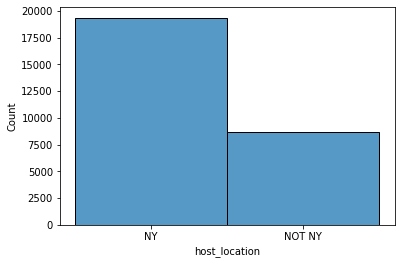

In [18]:
#Plotting to determine if this is a balanced data set.
sns.histplot(data=df, x="host_location")

The locations are imbalanced, which can be a problem for an MLE who would be narrowing in on locations. For the sake of this project, the MLE is focusing on review_scores_location in New York only; therefore, this is not a major issue. Instead the MLE should focus on working with a balanced dataset for the review_scores_location ratings.

<AxesSubplot:xlabel='review_scores_location', ylabel='Count'>

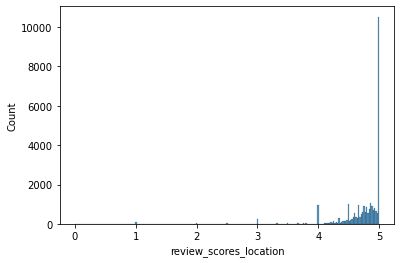

In [19]:
sns.histplot(data=df, x="review_scores_location")

In [20]:
#Winsorizing, or removing outliers.
df['label'] = stats.mstats.winsorize(df['review_scores_location'], limits=[0.01, 0.01])
original_counts = df['review_scores_location'].value_counts().sort_index()
winsorized_counts = df['label'].value_counts().sort_index()
print("Original count: ")
print(original_counts) #153
print("Label count: ")
print(winsorized_counts) #145


Original count: 
0.00        9
1.00       93
2.00       39
2.20        1
2.33        1
        ...  
4.96      287
4.97      248
4.98      168
4.99       70
5.00    10285
Name: review_scores_location, Length: 153, dtype: int64
Label count: 
3.00      409
3.14        1
3.17        1
3.20        3
3.25        4
        ...  
4.96      287
4.97      248
4.98      168
4.99       70
5.00    10285
Name: label, Length: 145, dtype: int64


In [21]:
df.corr()['label']
exclude = ['label','review_scores_location']
corrs = df.corr()['label'].drop(exclude, axis = 0)

In [22]:
corrs_sorted = corrs.sort_values(ascending = False)
corrs_sorted

review_scores_rating              0.531543
review_scores_cleanliness         0.433851
price                             0.110427
reviews_per_month                 0.013371
host_total_listings_count         0.006859
calculated_host_listings_count    0.005785
minimum_nights                   -0.004304
number_of_reviews                -0.004697
maximum_nights                   -0.007440
bedrooms                         -0.012394
accommodates                     -0.018423
bathrooms                        -0.021526
beds                             -0.028467
instant_bookable                 -0.030752
availability_365                 -0.092883
availability_90                  -0.097176
availability_60                  -0.105558
availability_30                  -0.113045
host_is_superhost                      NaN
Name: label, dtype: float64

In [23]:
top_four_corr = list(corrs_sorted.index[:4]) 
top_four_corr

['review_scores_rating',
 'review_scores_cleanliness',
 'price',
 'reviews_per_month']

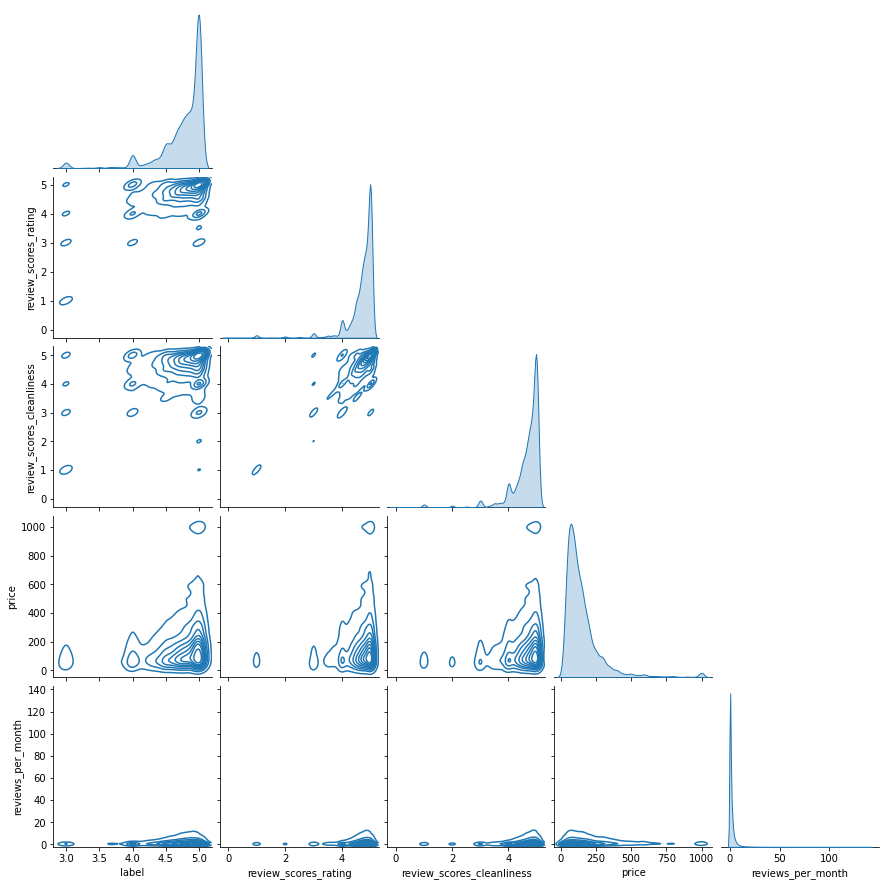

In [24]:
df_sub = df[['label'] + top_four_corr]
sns.pairplot(df_sub, kind = 'kde', corner = True)

Comparison of Airbnbs with review_scores_location >= 4.5. 

The comparison number is so high as there are several AirBNBs that rate above 3 stars. The data was too imbalanced with a score of 3; therefore, it was boosted to 4.5. 

Even now, there is a slight imbalance in points. This could be added to further considerations when taking a second approach to this project. (24478, 3544)

In [25]:
condition = df['review_scores_location'] >= 4.5
df_3 = df[condition]
print(df_3.shape)
num_rows = df_3.shape[0]
print(num_rows)

pos_reviews = df[condition]['reviews_per_month'].mean()
print(pos_reviews)

(24478, 26)
24478
1.835325598496609


In [26]:
condition2 = df['review_scores_location'] < 4.5
df_lessthan = df[condition2]
print(df_lessthan.shape)
num_rows = df_lessthan.shape[0]
print(num_rows)

neg_reviews = df[condition2]['reviews_per_month'].mean()
print(neg_reviews)

(3544, 26)
3544
1.2264898419864558


In [27]:
#True = Good Reviews, False = Bad Reviews

In [28]:
good_review = (df['review_scores_location'] >= 4.5)
df['label'] = np.where(good_review, True, False)
df.head(1327)

,name,description,neighborhood_overview,host_location,host_is_superhost,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,...,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,instant_bookable,calculated_host_listings_count,reviews_per_month,label
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,NY,1.0,8.0,1,1.0,1.329708,1.000000,...,63,338,48,4.70,4.62,4.86,False,3,0.33,True
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,NY,1.0,1.0,3,1.0,1.000000,3.000000,...,18,194,409,4.45,4.49,4.71,False,1,4.86,True
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,"Brooklyn, New York, United States",NY,1.0,1.0,4,1.5,2.000000,2.000000,...,12,123,2,5.00,5.00,4.50,False,1,0.02,True
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",NY,1.0,1.0,2,1.0,1.000000,1.000000,...,34,192,507,4.21,3.73,4.87,False,1,3.68,True
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,NY,1.0,1.0,1,1.0,1.000000,1.000000,...,0,0,118,4.91,4.82,4.94,False,1,0.87,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,Cozy 1 Bedroom Brownstone In Clinton Hill!,Located on the garden level of our 1860s brown...,The location is primed for exploring at comfor...,NOT NY,1.0,1.0,2,1.0,1.000000,1.000000,...,32,307,141,4.82,4.91,4.84,False,1,1.88,True
1323,"Comfortable Apartment in Maspeth, NY",We are a Hispanic family from Colombia and Ecu...,"We live in a neighborhood that is quiet, safe ...",NOT NY,1.0,0.0,6,2.0,3.000000,4.000000,...,61,61,130,4.75,4.77,4.50,False,1,1.32,True
1324,Cozy and full of plants,Enjoy a cozy and calm alcove in the midst of t...,"Neighborhood is full of parks, gardens, outdoo...",NY,1.0,1.0,3,1.0,1.000000,2.000000,...,0,0,100,4.82,4.89,4.53,False,1,1.21,True
1325,Lovely spacious 1 Bdrm in Ridgewood,"Beautiful, clean and Private full one bedroom ...",LOTS of amentities nearby (Myrtle Avenue shopp...,NY,1.0,1.0,2,1.0,1.000000,1.629556,...,0,0,1,5.00,5.00,4.00,False,1,0.01,False


In [29]:
#KNN Model: Label produced from top four correlations
y = df['label'] 

four_corr = ['review_scores_rating', 'review_scores_cleanliness', 'price', 'reviews_per_month']
X = df[four_corr]

print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 28022

Number of Features:4
['review_scores_rating', 'review_scores_cleanliness', 'price', 'reviews_per_month']


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [31]:
X_train.shape

(18774, 4)

In [32]:
X_test.shape

(9248, 4)

In [33]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    '''
    Fit a k Nearest Neighbors classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test data.
    '''
    
    # 1. Create the  KNeighborsClassifier model object
    model = KNeighborsClassifier(n_neighbors = k)

    # 2. Fit the model to the training data below
    model.fit(X_train, y_train) 
    
    # 3. Make predictions on the test data below
    class_label_predictions = model.predict(X_test) 

    # 4. Compute the accuracy 
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    return acc_score

In [34]:
k_values = [1, 5, 10, 100, 1000]

acc1 = [] 

for k in k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1.append(float(score))

k=1, accuracy score: 0.821583044982699
k=5, accuracy score: 0.86905276816609
k=10, accuracy score: 0.8734861591695502
k=100, accuracy score: 0.8728373702422145
k=1000, accuracy score: 0.871864186851211


When k = 1, the accuracy score is 0.821583, meaning the KNN model considers only the nearest neighbor for classification. The model correctly predicted the positive/negative label about 82.16% of the test instances.

When k = 5, the model considers the results of the five nearest neighbors with an accuracy score of 0.8691, or 86.91%.

When k = 10, the model considers the results of the ten nearest neighbors, the model correctly predicted the labels for about 87.35% of the test instances.

When k = 100, the accuracy score was approximately 87.28%.

When k = 1000, the accuracy score was approximately 87.19%.

Therefore, from the following results, when k = 100, the labels were predicted most accurately.

In [35]:
#Limiting to 1500 cases
k_values = [10, 100, 1000]

acc2 = [] 

for k in k_values:
    score = train_test_knn(X_train[:1500], X_test, y_train[:1500], y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc2.append(float(score))


k=10, accuracy score: 0.8677551903114187
k=100, accuracy score: 0.871864186851211
k=1000, accuracy score: 0.871864186851211


In the following instance, the MLE restricts the number of cases in the training data to 1500.



When k = 10, accuracy score = 86.78%

When k = 100, accuracy score = 87.19%

When k = 1000, accuracy score = 87.19%



The accuracy scores obtained after limiting the trainign dataset are still consistent with the previous scores, indicating that the model's performance remains relatively stable even with a smaller training dataset.

The accuracy score for k = 100 and k = 1000 are the same with one another and k = 1000 matches the attempt on the larger training dataset, suggesting that the choice of k might not be significantly affected by the size of the training dataset in this specific case.

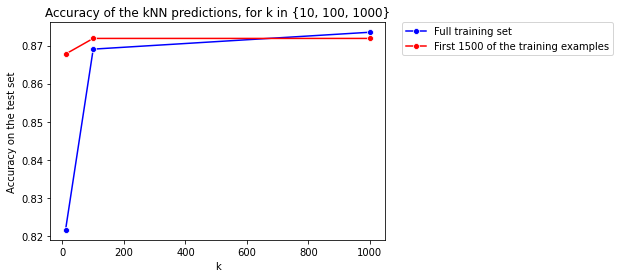

In [36]:
# Visualizing accuracy:
common_range = min(len(acc1), len(acc2))
k_values = k_values[:common_range]
acc1 = acc1[:common_range]
acc2 = acc2[:common_range]

fig = plt.figure()
ax = fig.add_subplot(111)
p1 = sns.lineplot(x=k_values, y=acc1, color='b', marker='o', label='Full training set')
p2 = sns.lineplot(x=k_values, y=acc2, color='r', marker='o', label='First 1500 of the training examples')

plt.title('Accuracy of the kNN predictions, for k in {10, 100, 1000}')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy on the test set')
plt.show()

In [37]:
#KNN with GridSearch
num_examples = len(X_train)
param_grid = {'n_neighbors': np.linspace(2, np.sqrt(num_examples), 10, dtype = int).tolist()}

param_grid

{'n_neighbors': [2, 17, 32, 47, 62, 77, 92, 107, 122, 137]}

In [38]:
print('Running Grid Search...')

# 1. Create a KNeighborsClassifier model object without supplying arguments. 
model = KNeighborsClassifier()

# 2. Run a grid search with 5-fold cross-validation and assign the output to the object 'grid'.
#    * Pass the model and the parameter grid to GridSearchCV()
#    * Set the number of folds to 5
grid = GridSearchCV(model, param_grid, cv = 5)

# 3. Fit the model (use the 'grid' variable) on the training data
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [39]:
best_k = grid_search.best_params_['n_neighbors']

In [40]:
# 1. Create the  model object below and assign to variable 'model_best'
model_best = KNeighborsClassifier(best_k)

# 2. Fit the model to the training data below
model_best.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [41]:
# 1. Make predictions on the test data using the predict_proba() method
probability_predictions = model_best.predict_proba(X_test)[:,-1].tolist()

# 2. Make predictions on the test data using the predict() method 
class_label_predictions = model_best.predict(X_test).tolist()
#look-up .tolist()

In [42]:
# Compute and print the model's accuracy score
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy score: ' + str(acc_score))

# Create a confusion matrix
c_m = confusion_matrix(y_test, class_label_predictions, labels = [True, False])
#cmat
# Create a Pandas DataFrame out of the confusion matrix for display
print('Confusion Matrix for the model: ')
pd.DataFrame(c_m, columns=['Predicted: Good Review', 'Predicted: Bad Review'],
                            index=['Actual: Good Review', 'Actual: Bad Review'])

Accuracy score: 0.8751081314878892
Confusion Matrix for the model: 


,Predicted: Good Review,Predicted: Bad Review
Actual: Good Review,7977,86
Actual: Bad Review,1069,116


In [43]:
print("Best k value: " + str(best_k))

Best k value: 17


The accuracy score of 0.8751 indicates that the KNN model predicted the positive/negative label for about 87.51% of the test instances. 

In comparison to the previous work with the manual changes to the K-nearest-neighbor, the GridSearch helped us identify a k value that proved to be 0.23% more accurate.

The best value of k was determined to be 17. 

In [44]:
#Decision Tree Model
def train_test_DT(X_train, X_test, y_train, y_test, leaf, depth, crit='entropy'):
    '''
    Fit a Decision Tree classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test set.
    Parameters:
        leaf := The minimum number of samples required to be at a leaf node 
        depth := The maximum depth of the tree
        crit := The function to be used to measure the quality of a split. Default: gini.
    '''
    
     # 1. Create the  Scikit-learn DecisionTreeClassifier model object
    model = DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf)

    # 2. Fit the model to the training data below
    model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data
    class_label_predictions = model.predict(X_test)
        
    # 4. Compute the accuracy
    acc_score = accuracy_score(y_test, class_label_predictions)
        
    
    return acc_score

In [45]:
depth1= 5
depth2 = 500
leaf = 5

max_depth_range = [depth1, 10, 20, 30, 40, 50, 100, 150, 250, 300, 350, depth2]
acc = []

for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, 1, md)
    print('Max Depth=' + str(md) + ', accuracy score: ' + str(score))
    acc.append(float(score))

Max Depth=5, accuracy score: 0.879325259515571
Max Depth=10, accuracy score: 0.8705666089965398
Max Depth=20, accuracy score: 0.8333693771626297
Max Depth=30, accuracy score: 0.8224480968858131
Max Depth=40, accuracy score: 0.8216911764705882
Max Depth=50, accuracy score: 0.8229887543252595
Max Depth=100, accuracy score: 0.8206098615916955
Max Depth=150, accuracy score: 0.8201773356401384
Max Depth=250, accuracy score: 0.8207179930795848
Max Depth=300, accuracy score: 0.8221237024221453
Max Depth=350, accuracy score: 0.8213667820069204
Max Depth=500, accuracy score: 0.8210423875432526


As "max_depth" increases, the model becomes more complex and captures finer details in the training data. Overly complex trees can lead to overfitting on the training data and decreased performance on unseen data.

From the above output, the best accuracy score is achieved at max_depth = 5, 87.93%, suggesting that a moderately complex Decision Tree with limited depth performs well on the dataset.

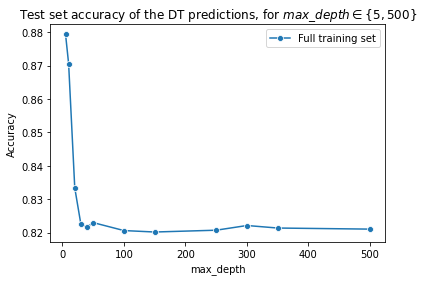

In [46]:
#Visualize results
fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=max_depth_range, y=acc, marker='o', label = 'Full training set')

plt.title('Test set accuracy of the DT predictions, for $max\_depth\in\{5, 500\}$')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()

In [47]:
#Decision Tree PT. 2, best value for one hyperparameter with validation curve
hyperparams = [2**n for n in range(1,15)]
hyperparams

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

In [48]:
print('Running k-fold Cross-Validation...')

accuracy_scores = []

for md in hyperparams:
    
    # 1. Create a DecisionTreeClassifier model object
    model = DecisionTreeClassifier(max_depth = hyperparams[0], min_samples_leaf = 1)
    
    # 2. Perform a k-fold cross-validation for the decision tree
    acc_score = cross_val_score(model, X_train, y_train, cv = 5)
    
    # 3. Find the mean of the resulting accuracy scores 
    acc_mean = acc_score.mean()
    
    # 4. Append the mean score to the list accuracy_scores
    accuracy_scores.append(acc_mean)
    
print('Done\n')

for s in range(len(accuracy_scores)):
    print('Accuracy score for max_depth {0}: {1}'.format(hyperparams[s], accuracy_scores[s]))

Running k-fold Cross-Validation...
Done

Accuracy score for max_depth 2: 0.881804661800604
Accuracy score for max_depth 4: 0.881804661800604
Accuracy score for max_depth 8: 0.881804661800604
Accuracy score for max_depth 16: 0.881804661800604
Accuracy score for max_depth 32: 0.881804661800604
Accuracy score for max_depth 64: 0.881804661800604
Accuracy score for max_depth 128: 0.881804661800604
Accuracy score for max_depth 256: 0.881804661800604
Accuracy score for max_depth 512: 0.881804661800604
Accuracy score for max_depth 1024: 0.881804661800604
Accuracy score for max_depth 2048: 0.881804661800604
Accuracy score for max_depth 4096: 0.881804661800604
Accuracy score for max_depth 8192: 0.881804661800604
Accuracy score for max_depth 16384: 0.881804661800604


With the MLE implementing a validation curve to explore the effect of changing the max_depth hyperparameter on the accuracy of the DT model, the accuracy scores are consistently high and approximately equal for all tested max_depth values.

The highest score achieved was 0.8818, or 88.18%.

Conclusion: The accuracy score does not seem to vary much as max_depth increases, and the consistent high accuracy scores could suggest that the dataset does not require very deep DT to achieve good performance.

In [49]:
model = DecisionTreeClassifier(max_depth = 4)
    
# 2. Fit the model to the training data 
model.fit(X_train, y_train)

# 3. Use the predict() method to make predictions on the test data
class_label_predictions = model.predict(X_test)

# 4. Compute the accuracy score
acc_score = accuracy_score(y_test, class_label_predictions)

print(acc_score)

0.8790008650519031


Now, by implementing a max_depth, in this case 4, the accuracy score of the DT predicting the correct positive/negative label upheld for 87.9% of the cases.

In [50]:
print('Running Validation Curve Implementation...')

# Create a DecisionTreeClassifier model object without supplying arguments
model = DecisionTreeClassifier()

# Create a range of hyperparameter values for 'max_depth'. Note these are the same values as those we used above
hyperparams = [2**n for n in range(1,15)]

# Call the validation_curve() function with the appropriate parameters
training_scores, validation_scores = validation_curve(model, X_train, y_train,
                                       param_name = "max_depth",
                                       param_range = hyperparams,
                                        cv = 5)

print('Done\n')

print(validation_scores)

Running Validation Curve Implementation...
Done

[[0.87643142 0.88788282 0.88015979 0.88202397 0.88252531]
 [0.87749667 0.88335553 0.88015979 0.88229028 0.88199254]
 [0.8713715  0.87882823 0.87776298 0.87509987 0.88039425]
 [0.83275632 0.84474035 0.84047936 0.84181092 0.84283431]
 [0.81038615 0.82663116 0.82316911 0.82237017 0.81699521]
 [0.80958722 0.82902796 0.82130493 0.81944075 0.81912627]
 [0.80985353 0.83195739 0.82316911 0.82183755 0.82099094]
 [0.81438083 0.8276964  0.82663116 0.81757656 0.81646244]
 [0.80745672 0.8252996  0.82157124 0.81704394 0.8185935 ]
 [0.80852197 0.83142477 0.82316911 0.81651132 0.81566329]
 [0.81225033 0.82716378 0.82450067 0.81651132 0.81619606]
 [0.80745672 0.83302264 0.82263648 0.8207723  0.81726159]
 [0.81118509 0.83089214 0.82423435 0.82050599 0.81832712]
 [0.80932091 0.8276964  0.82370173 0.81944075 0.81992541]]


The validation_scores matrix provides insight into how the model's performance changes with different values of the max_depth hyperparameter across different cross-validation folds.

Row = max_depth value
Column = cross-validation curve

Higher values of max_depth tend to lead to better training accuracy; however, the validation accuracy tends to peak around a certain max_depth and begins to decrease/stabilize. Indicates point of diminishing returns (increasing model complexity leads to overfitting, worse performance).

In [51]:
mean_validation_scores = np.mean(validation_scores, axis = 1)
for h in range(0, len(hyperparams)):
    print('Results of cross-validation for max_depth of {0}: {1}'.format(hyperparams[h], mean_validation_scores[h]))
    

Results of cross-validation for max_depth of 2: 0.881804661800604
Results of cross-validation for max_depth of 4: 0.8810589609875521
Results of cross-validation for max_depth of 8: 0.8766913658719648
Results of cross-validation for max_depth of 16: 0.8405242521603231
Results of cross-validation for max_depth of 32: 0.8199103592652524
Results of cross-validation for max_depth of 64: 0.8196974235028132
Results of cross-validation for max_depth of 128: 0.821561703911744
Results of cross-validation for max_depth of 256: 0.8205494786918809
Results of cross-validation for max_depth of 512: 0.8179930009853671
Results of cross-validation for max_depth of 1024: 0.8190580912539277
Results of cross-validation for max_depth of 2048: 0.8193244312147823
Results of cross-validation for max_depth of 4096: 0.8202299473548675
Results of cross-validation for max_depth of 8192: 0.8210289388611314
Results of cross-validation for max_depth of 16384: 0.8200170399687293


A max_depth of approximately 2 or 4 leads to better performance, whereas anything larger may contribute to overfitting.

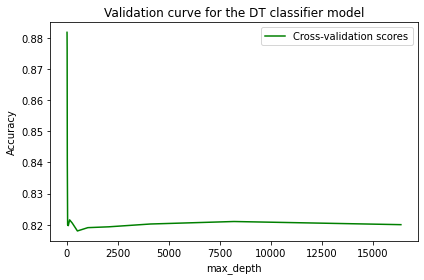

In [52]:
sns.lineplot(x=hyperparams, y=mean_validation_scores, label = "Cross-validation scores", color = 'g')

plt.title("Validation curve for the DT classifier model")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')

plt.show()

In [53]:
#Different combinations of possible hyperparameter values, GridSearch
# Create a range of hyperparameter values for 'max_depth'. 
hyperparams_depth = [2**n for n in range(1,15)]

# Create a range of hyperparameter values for 'min_samples_leaf'. 
hyperparams_leaf = [25*2**n for n in range(0,3)]

# Create parameter grid.
param_grid={'max_depth':hyperparams_depth, 'min_samples_leaf':hyperparams_leaf}
param_grid

{'max_depth': [2,
  4,
  8,
  16,
  32,
  64,
  128,
  256,
  512,
  1024,
  2048,
  4096,
  8192,
  16384],
 'min_samples_leaf': [25, 50, 100]}

In [54]:
print('Running Grid Search...')

model = DecisionTreeClassifier()
 
# 2. Run a Grid Search with 5-fold cross-validation using the model.
#   Pass all relevant parameters to GridSearchCV and assign the output to the object 'grid'
grid = GridSearchCV(model, param_grid, cv = 5)


# 3. Fit the model on the training data
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [55]:
# Print best-performing hyperparameter configuration
print('Optimal hyperparameters: {0}'.format(grid_search.best_params_))

# print best accuracy score resulting from this configuration
print('Accuracy score: {0}'.format(grid_search.best_score_))

Optimal hyperparameters: {'max_depth': 8, 'min_samples_leaf': 50}
Accuracy score: 0.8821773987019261


The purpose of the MLE implementing a Grid Search is to find the best combinations of hyperparameters that yield the highest accuracy score on cross-validated training data.

The best hyperparameters determined were a max_depth = 8 and min_sample_leaf = 50.

Accuracy score = 88.22%

In [56]:
#Logisitic Regression Model
model = LogisticRegression()

# 2. Fit the model to the training data below
model.fit(X_train, y_train)

# 3. Make predictions on the test data using the predict_proba() method
probability_predictions = model.predict_proba(X_test)

# print the first 5 probability class predictions
df_print = pd.DataFrame(probability_predictions, columns = ['Class: Bad', 'Class: Good'])
print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))

# 4. Compute the log loss on 'probability_predictions'
l_loss = log_loss(y_test, probability_predictions)
print('Log loss: ' + str(l_loss))


# 5. Make predictions on the test data using the predict() method
class_label_predictions = model.predict(X_test)

# print the first 5 class label predictions 
print('Class labels: ' + str(class_label_predictions[0:5]))

# 6.Compute the accuracy score on 'class_label_predictions'
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy: ' + str(acc_score))

Class Prediction Probabilities: 
 Class: Bad  Class: Good
   0.048900     0.951100
   0.082096     0.917904
   0.094270     0.905730
   0.098571     0.901429
   0.106380     0.893620
Log loss: 0.32091860320125243
Class labels: [ True  True  True  True  True]
Accuracy: 0.8819204152249135


To help interpret the above results:
Log loss is a measure of how well the predicted probabiltiies match the true labels. Hence, a lower log loss is indicative of a better fit.

Observations:
The model is predicting mostly positive class labels for the test instances (based on the probability predictions and class label).

The log loss was 0.3209, 32.09%.
The accuracy score is 0.8819, 88.19%.

In [57]:
#Ensuring model classes
print(model.classes_)

[False  True]


In [58]:
def computeAccuracy(threshold_value):
    labels = []
    for p in probability_predictions[:, 0]:
        if p >= threshold_value:
            labels.append(False)
        else:
            labels.append(True)

    acc_score = accuracy_score(y_test, labels)
    return acc_score

In [59]:
thresholds = [0.1, 0.15, 0.18, 0.2, 0.25, 0.3, 0.4, 0.50, 0.6, 0.7, 0.75]
for t in thresholds:
    print("Threshold value {:.2f}: Accuracy {}".format(t, str(computeAccuracy(t))))

Threshold value 0.10: Accuracy 0.679606401384083
Threshold value 0.15: Accuracy 0.826340830449827
Threshold value 0.18: Accuracy 0.8521842560553633
Threshold value 0.20: Accuracy 0.8628892733564014
Threshold value 0.25: Accuracy 0.8701340830449827
Threshold value 0.30: Accuracy 0.8755406574394463
Threshold value 0.40: Accuracy 0.8811634948096886
Threshold value 0.50: Accuracy 0.8819204152249135
Threshold value 0.60: Accuracy 0.8804065743944637
Threshold value 0.70: Accuracy 0.8802984429065744
Threshold value 0.75: Accuracy 0.8783520761245674


Explanation:
computeAccuracy takes threshold value as a parameter to compute class labels based on the probability predictions. If the probability of the positive class >= threshold, the label is set to False; otherwise, it is True.

Purpose of threshold values: to determine how conservative or aggressive the classification predictions are. High threshold = high confidence in predicting the negative class, low threshold = more willing to predict the positive class.

Observations: As the threshold increased, the accuracy improved until it reached a peak of 0.5 and started to decrease. At 0.5, the model's default class prediction probability cutoff is effective.

In [60]:
#Logistic Regression Pt.2, w normal regularization to observe if overfitting is occurring.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

In [61]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    
    '''
    Fit a Linear Regression classifier to the training data X_train, y_train.
    Return the loss and accuracy of resulting predictions on the test set.
    Parameters:
        C = Factor that controls how much regularization is applied to the model.
    '''
    model = LogisticRegression(C = c)
    
  
    # 2. Fit the model to the training data below
    model.fit(X_train, y_train)
    
    
    # 3. Make predictions on the test data using the predict_proba() method
    probability_predictions = model.predict_proba(X_test)
        
  
    # 4. Compute the log loss on 'probability_predictions'
    l_loss = log_loss(y_test, probability_predictions)
        
        
    # 5. Make predictions on the test data using the predict() method
    class_label_predictions = model.predict(X_test)
        
        
    # 6. Compute the accuracy score on 'class_label_predictions' 
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    
    return l_loss, acc_score

In [62]:
loss, acc = train_test_LR(X_train, y_train, X_test, y_test)
print('Log loss: ' + str(loss))
print('Accuracy: ' + str(acc))

Log loss: 0.32091860320125243
Accuracy: 0.8819204152249135


In [63]:
cs = [10**i for i in range(-10,10)]
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000]

In [64]:
ll_cs = []
acc_cs = []
for x in cs: 
    y, z = train_test_LR(X_train, y_train, X_test, y_test, x)
    ll_cs.append(y)
    acc_cs.append(z)  

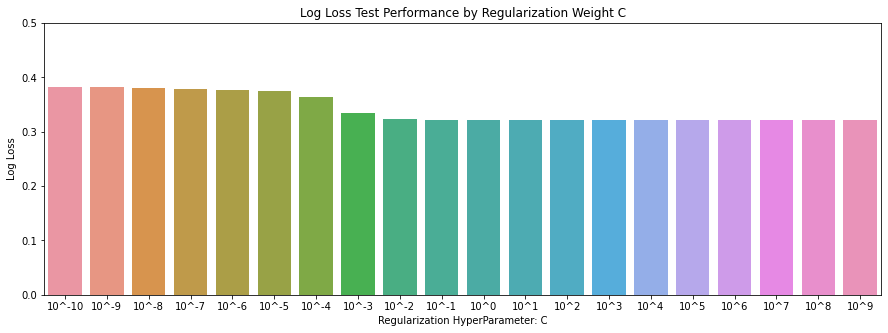

In [65]:
plt.figure(figsize=(15,5)) 

ax = sns.barplot(x=cs, y=ll_cs)
g = ax.set_xticklabels([f'10^{i}' for i in range(-10,10)])
ax.set_xlabel('Regularization HyperParameter: C')
ax.set_ylabel('Log Loss')
ax.set_ylim([0.0, 0.50])
g = plt.title('Log Loss Test Performance by Regularization Weight C')

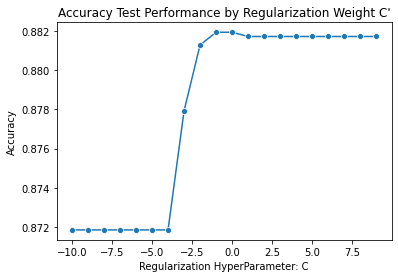

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.log10(cs)

sns.lineplot(x=x, y=acc_cs, marker='o')

plt.title("Accuracy Test Performance by Regularization Weight C'")
plt.xlabel("Regularization HyperParameter: C")
plt.ylabel("Accuracy")
plt.show()

In [67]:
# 1. Create the  Scikit-learn LogisticRegression model object 
model_default = LogisticRegression(max_iter = 1000, C = 1.0)

# 2. Fit the model to the training data below
model_default.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
# 1. Make predictions on the test data using the predict_proba() method
proba_predictions_default = model_default.predict_proba(X_test)[:, 1]

# 2. Make predictions on the test data using the predict() method
class_label_predictions_default = model_default.predict(X_test)

In [69]:
labels = [True, False]
cm = confusion_matrix(y_test, class_label_predictions_default, labels=labels)
pd.DataFrame(cm, columns=["Predicted: Good Review", "Predicted: Bad Review"],
                  index=["Actual: Good Review", "Actual: Bad Review"])


,Predicted: Good Review,Predicted: Bad Review
Actual: Good Review,7979,84
Actual: Bad Review,1008,177


In [70]:
from sklearn.svm import l1_min_c

cs = l1_min_c(X_train, y_train, loss="log") * np.logspace(0, 7, 16)
param_grid = dict(C = list(cs))
param_grid

{'C': [8.696642834966418e-07,
  2.546937576911141e-06,
  7.459074891060583e-06,
  2.184497913683715e-05,
  6.397617941344983e-05,
  0.00018736349010468886,
  0.0005487210669043108,
  0.0016070089700846713,
  0.004706358085542473,
  0.013783250026404001,
  0.040366240272698736,
  0.11821837016899552,
  0.3462195872342823,
  1.013954112320474,
  2.969511199826764,
  8.696642834966418]}

In [71]:
print('Running Grid Search...')
model = LogisticRegression(max_iter = 1000)

# 2. Run a grid search with 5-fold cross-validation
grid = GridSearchCV(model, param_grid, cv = 5)

# 3. Fit the model on the training data
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [72]:
best_c = grid_search.best_params_['C']

In [73]:
model_best = LogisticRegression(max_iter = 1000, C = best_c)

# 2. Fit the model to the training data below
model_best.fit(X_train, y_train)

LogisticRegression(C=0.013783250026404001, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
# 1. Make predictions on the test data using the predict_proba() method
proba_predictions_best = model_best.predict_proba(X_test)[:,1]

# 2. Make predictions on the test data using the predict() method
class_label_predictions_best = model_best.predict(X_test)

In [75]:
acc_score = accuracy_score(y_test, class_label_predictions_best)
print('Accuracy score: ' + str(acc_score))
cm = confusion_matrix(y_test, class_label_predictions_best, labels = [True, False])
print("Confusion Matrix for the model: ")
pd.DataFrame(cm, columns=["Predicted: Good Review", "Predicted: Bad Review"],
                            index=["Actual: Good Review", "Actual: Bad Review"])                                                

Accuracy score: 0.8811634948096886
Confusion Matrix for the model: 


,Predicted: Good Review,Predicted: Bad Review
Actual: Good Review,7991,72
Actual: Bad Review,1027,158


In [76]:
precision_default, recall_default, thresholds_default = precision_recall_curve(y_test, proba_predictions_default)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)

<AxesSubplot:>

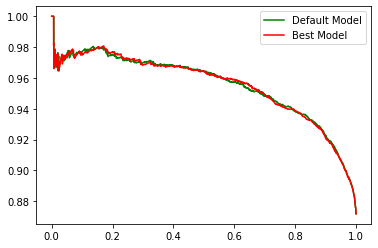

In [77]:
sns.lineplot(x = recall_default, y = precision_default, color = "green", label = "Default Model")
sns.lineplot(x = recall_best, y = precision_best, color = "red", label = "Best Model")

In [78]:
fpr_default, tpr_default, thresholds_default = roc_curve(y_test, proba_predictions_default)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, proba_predictions_best)

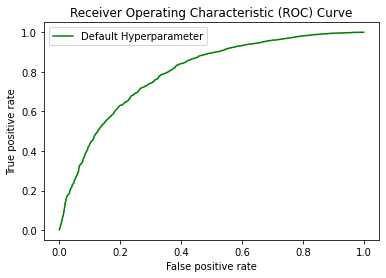

In [79]:
sns.lineplot(x = fpr_default, y = tpr_default, color = "green", label = "Default Hyperparameter")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

An increasing, upward-curved ROC curve is a positive indicator of a good classifier as it indicates that as the MLE decreases the classfication threshold, making it easier to classify a data point as positive), the true positive rate increases more than the false positive rate. Thus, the model will correctly classify positive instances while keeping the false positive rate relatively low.

As for the AUC (the area under the ROC curve), a perfect classifier will have an AUC of 1.0 and a random classifier will have an AUC of 0.5. The larger the AUc, the better the classifier's ability to distiniguish between positive/negative classes.

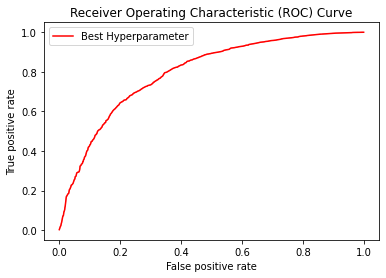

In [80]:
sns.lineplot(x = fpr_best, y = tpr_best, color = "red", label = "Best Hyperparameter")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

In [81]:
auc_default = auc(fpr_default, tpr_default)
auc_best = auc(fpr_best, tpr_best)

print(auc_default)
print(auc_best)

0.7956345885853544
0.7949554431845002


AUC for the default model = 79.56%
AUC for the best model = 79.49%

Both AUC values are in between 0.5 and 1.0 meaning that the models are performing somewhat better than random guessing. However, there may be some comparison to a random classifier. 


Why does the default model perform better than the "best" model?

There may be several reasons producing such results:

-There may be random variations in the data.

-The best model may be overfitting to the training data.

-Consideration of more varied hyperparameters.

-An imbalance in the dataset, which may be a cause considering this was an above-mentioned concern.

How can the MLE improve this model in the future?


-Return to square one: data quality and preprocessing as well as feature selection

-Hyperparameter tuning

-Regularization and overfitting

-ENSEMBLE METHODS


Ensemble methods combine the predictions of multiple models using stacking/bagging. This leverages the strengths of other models.

Rather than using a boolean label, this time we will return
to "review_scores_location" as our label. We will be working with 
stacking regression models.

In [82]:
df = pd.read_csv(airbnbDataSet_filename, header = 0)
df.head(40)

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,Laurie,"New York, New York, United States","Hello, \r\nI will be welcoming and helpful, w...",1.00,1.00,True,3.0,...,4.82,4.87,4.73,False,3,1,2,0,1.48,7
6,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,Allen & Irina,"New York, New York, United States",We love to travel. When we travel we like to s...,1.00,1.00,True,1.0,...,4.80,4.67,4.57,True,1,1,0,0,1.24,7
7,UES Beautiful Blue Room,Beautiful peaceful healthy home<br /><br /><b>...,"Location: Five minutes to Central Park, Museum...",Cyn,"New York, New York, United States",Capturing the Steinbeck side of life in its Fi...,1.00,1.00,True,3.0,...,4.95,4.84,4.84,True,1,0,1,0,1.82,5
8,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",Joelle,"New York, New York, United States",I have lived in the same apartment in Brooklyn...,1.00,0.00,True,2.0,...,5.00,5.00,5.00,False,2,0,2,0,0.07,5
9,Perfect for Your Parents: Privacy + Garden,"Parents/grandparents coming to town, or are yo...","Residential, village-like atmosphere. Lots of ...",Jane,"New York, New York, United States",I have been an Airbnb host since 2009 -- just ...,1.00,0.99,True,1.0,...,4.91,4.93,4.78,True,2,1,1,0,3.05,8


In [83]:
y = df['review_scores_location']
four_corr = ['review_scores_rating', 'review_scores_cleanliness', 'price', 'reviews_per_month']
X = df[four_corr]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1234)


In [89]:
estimators = [("DT", DecisionTreeRegressor()),
              ("RF", RandomForestRegressor()),
              ("GBDT", GradientBoostingRegressor()),
              ("LR", LinearRegression())
             ]

In [90]:
stacking_model = StackingRegressor(
    estimators=estimators,  
    cv=5,                   
    passthrough=False      
)                                   

In [91]:
print('Performing Cross-Validation...')


rmse_scores = cross_val_score(stacking_model, X_train, y_train, cv = 3, scoring = 'neg_root_mean_squared_error')
rmse_avg = np.mean(-rmse_scores)


print('End')
print('average score: {}'.format(rmse_avg))


Performing Cross-Validation...
End
average score: 0.332591570091403


The scoring metric is RMSE or the root mean squared error. It measures the average magnitude of the errors between the predicted vs actual values.

A lower RMSE value indicates better predictive performance. So, a RMSE of .333 suggests that the stacking model is providing reasonably accurate predictions for the target variable review_scores_location.

In [45]:
##Determing best hyperparameters for following attempt.
# stacking = StackingRegressor(estimators=estimators, passthrough=False)
# params = {
#     "DT__max_depth": [2, 4, 8],
#     "GBDT__n_estimators": [100, 300]
# }

# # Perform grid search
# stack_grid = GridSearchCV(stacking, params, cv=3, verbose=4, scoring='neg_root_mean_squared_error', refit=True, n_jobs=-1)
# stack_grid.fit(X_train, y_train)

## Print the best parameters and results
# print("Best parameters:", stack_grid.best_params_)
# print("Best RMSE:", -1 * stack_grid.best_score_)

In [46]:
#Result of the above code, material and cost saving
#Best parameters: {'DT__max_depth': 2, 'GBDT__n_estimators': 100}
#Best RMSE: 0.33367622077875164

In [92]:
estimators_best = [("DT", DecisionTreeRegressor(max_depth = 2)),
              ("RF", RandomForestRegressor()),
              ("GBDT", GradientBoostingRegressor(n_estimators = 100)),
              ("LR", LinearRegression())
             ]

In [93]:
print('Implement Stacking...')

stacking_best_model = StackingRegressor(estimators = estimators_best, cv = 5, passthrough = False)
stacking_best_model.fit(X_train, y_train)

print('End')

Implement Stacking...
End


In [94]:
# 1. Use predict() to test use the fitted model to make predictions on the test data
stacking_best_pred = stacking_best_model.predict(X_test)

# 2. Compute the RMSE using mean_squared_error()
rmse = mean_squared_error(y_test, stacking_best_pred, squared = False)

# 3. Compute the R2 score using r2_score()
r2 = r2_score(y_test, stacking_best_pred)

           
print('Root Mean Squared Error: {0}'.format(rmse))
print('R2: {0}'.format(r2))    

Root Mean Squared Error: 0.3255051428515283
R2: 0.37855428926433876


The R2 score reveals the proportion of the variance in the target variable that is explained by the model. A higher value, on a scale of 0 to 1, indicates a better fit to the data. Hence, the R2 explains a 37.85% variance in the target variable.

Already, the results suggest that the stacking model is providing better predictions and capturing more variance than individual base models.

In [95]:
# 1. Create the LinearRegression model object below
lr_model = LinearRegression()

# 2. Fit the model to the training data below
lr_model.fit(X_train, y_train)

# 3.  Call predict() to use the fitted model to make predictions on the test data. 
y_lr_pred = lr_model.predict(X_test)

# 4: Compute the RMSE and R2 (on y_test and y_lr_pred)
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared = False)
lr_r2 = r2_score(y_test, y_lr_pred)


print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.33605973382266197
[LR] R2: 0.33759981710250053


Given that a lower RMSE indicates better predictive performance and a higher R2 indicates a better fit to the data, the stacking model performs better than the LinearRegression model above.


Stacking model:(RMSE: 0.3255, R2: 0.3785) 

Linear Regression model: (RMSE: 0.336, R2: 0.3375)

In [96]:
# 1. Create the DecisionTreeRegressor model object using the hyperparameter values above 
dt_model = DecisionTreeRegressor(max_depth = 2, min_samples_leaf = 50)

# 2. Fit the model to the training data below
dt_model.fit(X_train, y_train)

# 3.  Call predict() to use the fitted model to make predictions on the test data.
y_dt_pred = dt_model.predict(X_test)

# 4: Compute the RMSE and R2 (on y_test and y_dt_pred)
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared = False)
dt_r2 = r2_score(y_test, y_dt_pred)


print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))


[DT] Root Mean Squared Error: 0.34177954401134275
[DT] R2: 0.3148595357703544


Interpretation of metrics:


Stacking model:(RMSE: 0.3255, R2: 0.3785)

Decision Tree Model: (RMSE: 0.3417, R2: 0.3148)



The decision tree regression model is accurate within approximately 0.3417 units of the actual values.
The decision tree refression model explains about 31.5% of the variance in the target variable.


Best model: Stacking

In [97]:
print('Begin GBDT Implementation...')

# 1. Create the  GradientBoostingRegressor model object below
gbdt_model = GradientBoostingRegressor()

# 2. Fit the model to the training data below
gbdt_model.fit(X_train, y_train)

# 3. Call predict() to use the fitted model to make predictions on the test data.
y_gbdt_pred = gbdt_model.predict(X_test)

# 4. Compute the RMSE and R2 (on y_test and y_gbdt_pred)
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared = False)
gbdt_r2 = r2_score(y_test, y_gbdt_pred)


print('End')

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))   

Begin GBDT Implementation...
End
[GBDT] Root Mean Squared Error: 0.32595939299541254
[GBDT] R2: 0.3768185945622804


Interpretation of metrics:



Stacking model:(RMSE: 0.3255, R2: 0.3785)

Decision Tree Model: (RMSE: 0.3417, R2: 0.3148)

GBDT Model: (RMSE: 0.326, R2: 0.3768)



The GBDT Model provides the best performance in terms of both RMSE and nearly R2 given it has the lowest RMSE and the second highest R2. The model offers better predictions and captures a higher of amount variance in the target variable.

In [98]:
print('Begin RF Implementation...')

# 1. Create the  RandomForestRegressor model object below
rf_model = RandomForestRegressor()

# 2. Fit the model to the training data below
rf_model.fit(X_train, y_train)

# 3. Call predict() to use the fitted model to make predictions on the test data.
y_rf_pred = rf_model.predict(X_test)

# 4. Compute the RMSE and R2 (on y_test and y_rf_pred)
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared = False)
rf_r2 = r2_score(y_test, y_rf_pred)

print('End')

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))


Begin RF Implementation...
End
[RF] Root Mean Squared Error: 0.34731767728333895
[RF] R2: 0.29247586100933487


Interpretation of metrics:


Stacking model:(RMSE: 0.3255, R2: 0.3785)

Decision Tree Model: (RMSE: 0.3417, R2: 0.3148)

GBDT Model: (RMSE: 0.326, R2: 0.3768)

Random Forest Model: (RMSE: 0.3473, R2: 0.2924)


The Random Forest Model has the highest RMSE in comparison to the other models and it has the lowest R2; thus, the model performed the worst amongst those that were previously tested.

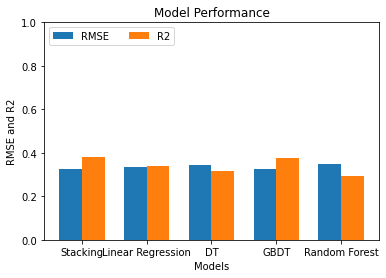

In [99]:
RMSE_Results = [rmse, lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [r2, lr_r2, dt_r2, gbdt_r2, rf_r2]

rg= np.arange(5)
width = 0.35

# 1. Create bar plot with RMSE results
plt.bar(rg, RMSE_Results, width, label='RMSE')

# 2. Create bar plot with R2 results
plt.bar(rg + width, R2_Results, width, label='R2')

# 3. Call plt.xticks() to add labels under the bars indicating which model the pair of RMSE 
# and R2 bars correspond to
plt.xticks(rg + width/2, ['Stacking', 'Linear Regression', 'DT', 'GBDT', 'Random Forest'])

# 4. Label the x and y axis of the plot: the x axis should be labeled "Models" and the y axis
# should be labeled "RMSE and R2"
plt.xlabel('Models')
plt.ylabel('RMSE and R2')

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

Observing the above model performance bar plot, the GBDT model performs the best in comparison to the other models. The RMSE and R2 scores of the GBDT model compare closely to that of the Stacking Model.

The bar plot confirms all of the conclusions the MLE has drawn thus far.

Here are the results of the models the MLE tested, from best to worse performance, of predicting the review_scores_location label:


1. Gradient Boosting (GBDT) Model

RMSE = 0.326

R2 = 0.3768

AUC = -0.795


2. Stacking Model with Best Estimators:

RMSE = 0.3255

R2 = 0.3785


3. Decision Tree Regressor Model:

RMSE = 0.3417

R2 = 0.3148


4. Logistic Regression Model

Accuracy = 0.882, 88.2%


5. Linear Regression Model:

RMSE: 0.336

R2: 0.3375



6. Random Forest Regressor Model:

RMSE = 0.3473

R2 = 0.2924


7. K-Nearest-Neighbors (KNN) Model:

Accuracy = 0.881, 88.1%


Considering Flaws:

The MLE has to consider that there is an imbalance in the data, as the ratio of Good (True) to Bad (False) review_scores_location is (24478, 3544).

Next Steps:

The description of the AirBNB listing can be very telling or convincing of what the experience might be like and how the guest might review their experience, or the review_scores_location.

To continue developing this project, the MLE can employ Natural Language Processing, either word embeddings or sentiment analysis, to determine if there is an accurate way of predicting if the listing description has an influence on the review_scores_location.

NLP is shown in other projects.